<h1 align="center"><font color="0066FF" size=110>Linear Equations & Iterative Methods</font></h1>


In [6]:
import matplotlib.pyplot as plt
try:
    %matplotlib inline
except: # not in notebook
    pass
LECTURE = False
if LECTURE:
    matplotlib.rcParams['font.size', 20]



# Learning Outcomes

After studying this notebook you should be able to
-   Give the motivation for using iterative methods to solve linear equations, as opposed to direct solver like Gaussian Elimination.
-   Describe the algorithm for the Jacobi Iteration method
-   Describe the algorithm for the Gauss-Seider and relaxed Gauss-Seider methods.
-   Test whether a given linear equation can be solved by using the Jacobi or Gauss-Seider methods.

# Introduction

Direct solvers such as Gaussian Elimination and LU decomposition allow for efficient solving. In this section we introduce iterative solutions methods. The choice of a direct method or an indirect method is a combination of the efficiency of the method (and in general iterative methods are more efficient), the particular structure of the matrix system, a trade-off between compute time and memory, and the computer architecture being used.

Iterative methods work by refining a guess to the solution and converging as quickly as possible from that guess to the actual solution. You may have met iterative methods previously in, for example, the general purpose solution of non-linear equations– such as bisection or Newton-Raphson techniques (along with their more advanced cousins).
Iterative methods for linear systems have become a widespread and powerful tool for solving the most complex scientific and engineering problems and can be extremely effective, especially when starting from a good guess at the final solution – and often effort is expended in making that initial guess as good as possible and which will start you off close to the final solution and yield a more rapid convergence to the answer. Their only drawback is that they may not necessarily converge to a solution for a particular matrix system.

In this section we will assume familiarity with linear equations of the form:

\begin{equation}
Ax = \begin{pmatrix}
          a_{11} & a_{12} & \cdots & a_{1n} \\
          a_{21} & a_{22} & \cdots & a_{2n} \\
          \vdots  & \vdots  & \ddots & \vdots \\
          a_{n1} & a_{n2} & \cdot & a_{nn}
    \end{pmatrix}
    \begin{pmatrix}
    x_1 \\ x_2 \\ \vdots \\ x_n
    \end{pmatrix}
    =
    \begin{pmatrix}
    b_1 \\ b_2 \\ \vdots \\ b_n
    \end{pmatrix}
    = b
\end{equation}

and their solution by Gaussian Elimination, LU Decomposition, along with issues which can arise such as a singular matrix, ill-conditioning, and poor scaling. We will also assume knowledge of norms matrices and vectors.

# Jacobi Iteration

Consider the set of equations (derived from Ref 1 Ex 3.26)

\begin{equation}
     \begin{pmatrix}
     4 & -1 & 1 \\
     4 & -8 & 1 \\
     -2 & 1 & 5
     \end{pmatrix}
     \begin{pmatrix}
     x_1 \\ x_2 \\ x_3
     \end{pmatrix}
     =
     \begin{pmatrix}
     7 \\ -21 \\ 15
     \end{pmatrix}
\end{equation}

These could be written:

\begin{align}
x_1 &= \frac{7 + x_2 - x_3}{4}   \\
x_2 &= \frac{21 + 4x_1 + x_3}{8} \\
x_3 &= \frac{15 + 2x_1 - x_2}{5}
\end{align}

And we could derive an iteration scheme which cycles through each of the values of $x_1$, $x_2$, and $x_3$ in turn to refine an initial guess. If $k$ is the k-th iteration, then $x_1^{(k+1)}$ is the next guess for $x_1$:

\begin{align}
x_1^{(k + 1)} &= \frac{7 + x_2^{(k)} - x_3^{(k)}}{4}   \\
x_2^{(k + 1)} &= \frac{21 + 4x_1^{(k)} + x_3^{(k)}}{8} \\
x_3^{(k + 1)} &= \frac{15 + 2x_1^{(k)} - x_2^{(k)}}{5}
\end{align}

Starting with an initial guess of (1,2,2) we obtain:

\begin{align}
x_1^{(1)} &= \frac{7 + 2 - 2}{4} = 1.75   \\
x_2^{(1)} &= \frac{21 + 4 + 2}{8} = 3.375 \\
x_3^{(1)} &= \frac{15 + 2 - 2}{5} = 3.00
\end{align}

In general we can write the Jacobi scheme as:

\begin{equation}
x_i^{(k+1)} = \frac{1}{a_{ii}} \left(b_i - \sum_{\substack{j=1 \\ j \neq i}}^n a_{ij} x_j^{(k)}\right), \qquad i=1, 2, \cdots, n
\end{equation}

The following table shows subsequent iterations

<table border="2" cellspacing="0" cellpadding="6" rules="groups" frame="hsides">


<colgroup>
<col  class="right" />

<col  class="right" />

<col  class="right" />

<col  class="right" />
</colgroup>
<thead>
<tr>
<th scope="col" class="right">$k$</th>
<th scope="col" class="right">$x_1^{(k)}$</th>
<th scope="col" class="right">$x_2^{(k)}$</th>
<th scope="col" class="right">$x_3^{(k)}$</th>
</tr>
</thead>

<tbody>
<tr>
<td class="right">0</td>
<td class="right">1.0</td>
<td class="right">2.0</td>
<td class="right">2.0</td>
</tr>


<tr>
<td class="right">1</td>
<td class="right">1.75</td>
<td class="right">3.375</td>
<td class="right">3.0</td>
</tr>


<tr>
<td class="right">2</td>
<td class="right">1.84375</td>
<td class="right">3.875</td>
<td class="right">3.025</td>
</tr>


<tr>
<td class="right">3</td>
<td class="right">1.9625</td>
<td class="right">3.925</td>
<td class="right">2.9625</td>
</tr>


<tr>
<td class="right">&#x2026;</td>
<td class="right">&#x2026;</td>
<td class="right">&#x2026;</td>
<td class="right">&#x2026;</td>
</tr>


<tr>
<td class="right">19</td>
<td class="right">2.0000</td>
<td class="right">4.0000</td>
<td class="right">3.0000</td>
</tr>
</tbody>
</table>

Python example code from Ref 2:



In [2]:
from pprint import pprint
from numpy import array, zeros, diag, diagflat, dot

def jacobi(A,b,N=25,x=None, info=True):
    """Solves the equation Ax=b via the Jacobi iterative method."""
    # Create an initial guess if needed
    if x is None:
        x = zeros(len(A[0]))

    # Create a vector of the diagonal elements of A
    # and subtract them from A
    D = diag(A)
    R = A - diagflat(D)

    # Iterate for N times
    for i in range(N):
        x = (b - dot(R,x))/D
        if info:
            pprint(x)
    return x

# Set up problem here
A = array([[4.0, -1.0, 1.0],[4.0, -8.0, 1.0] , [ -2.0, 1.0, 5.0]])
b = array([7.0 , -21.0, 15.0])
guess = array([1.0,2.0,2.0])

# Solve
sol = jacobi(A,b,N=25,x=guess)

print("A:")
pprint(A)

print("b:")
pprint(b)

print("x:")
pprint(sol)



array([ 1.75 ,  3.375,  3.   ])
array([ 1.84375,  3.875  ,  3.025  ])
array([ 1.9625,  3.925 ,  2.9625])
array([ 1.990625 ,  3.9765625,  3.       ])
array([ 1.99414062,  3.9953125 ,  3.0009375 ])
array([ 1.99859375,  3.9971875 ,  2.99859375])
array([ 1.99964844,  3.99912109,  3.        ])
array([ 1.99978027,  3.99982422,  3.00003516])
array([ 1.99994727,  3.99989453,  2.99994727])
array([ 1.99998682,  3.99996704,  3.        ])
array([ 1.99999176,  3.99999341,  3.00000132])
array([ 1.99999802,  3.99999604,  2.99999802])
array([ 1.99999951,  3.99999876,  3.        ])
array([ 1.99999969,  3.99999975,  3.00000005])
array([ 1.99999993,  3.99999985,  2.99999993])
array([ 1.99999998,  3.99999995,  3.        ])
array([ 1.99999999,  3.99999999,  3.        ])
array([ 2.        ,  3.99999999,  3.        ])
array([ 2.,  4.,  3.])
array([ 2.,  4.,  3.])
array([ 2.,  4.,  3.])
array([ 2.,  4.,  3.])
array([ 2.,  4.,  3.])
array([ 2.,  4.,  3.])
array([ 2.,  4.,  3.])
A:
array([[ 4., -1.,  1.],
     



## Convergence

It is a sufficient condition for the matrix to be *strictly diagonally dominant* for the Jacobi method to converge from any given starting vector.
A matrix is said to be strictly diagonally dominant if

\begin{equation}
|a_{ii}| > \sum_{\substack{j=1 \\ j \neq i}}^n |a_{ij}|, \qquad i=1, 2, \cdots, n.
\end{equation}

In the example above, we have

\begin{align}
&\text{Row 1}: & |4| &> |-1| + |1| \\
&\text{Row 2}: & |-8| &> |4| + |1| \\
&\text{Row 3}: & |5| &> |-2| + |1|
\end{align}

and the method will always converge for any given starting vector.

## Exercise 1

-   Solve the linear equation $A_2 x = b_2$ using Jacobi Iteration, where

\begin{align}
     A_2 &=\begin{pmatrix}
       -2 & 1 & 5 \\
        4 & -8 & 1 \\
        4 & -1 & 1
     \end{pmatrix},
     &
     b_2 &= \begin{pmatrix}
     15 \\ -21 \\ 7
     \end{pmatrix}
\end{align}

and explain what happens. Skeleton code:



In [4]:
A2 = array([[ -2.0, 1.0, 5.0], [4.0, -8.0, 1.0] , [4.0, -1.0, 1.0] ])
b2 = array([15.0 , -21.0, 7.0])
guess = array([1.0,2.0,2.0])


xold = 0
errlst = []
iterlst = [2, 4, 8, 16, 32, 64]
for N in iterlst:
    x = jacobi(A2, b2, N, info=False)
    dx = dot(x - xold, x - xold)
    print(dx)
    errlst.append(dx)
    xold = x.copy()



1698.17578125
162010.48468
1095789603.53
7.89512213422e+16
3.83888935946e+32
9.42053802568e+63


The solution diverges

Plot the evolution of the error:



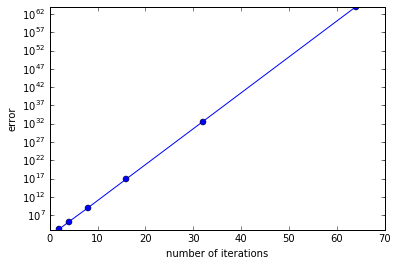

In [7]:

# Plot
plt.figure(1)
plt.clf()
plt.semilogy(iterlst, errlst, 'o-')
plt.xlabel('number of iterations')
plt.ylabel('error')
plt.savefig("fig01-01.pdf")



-   Implement a function that tests whether a matrix is diagonnally dominant. Skeleton code:



In [9]:
import numpy as np

def isdiagdom(A):
    """Takes a square matrix-like object A as input and returns True
    if matrix A is strictly diagonnally dominant, False otherwise.
    """
    d = np.diag(A)  # vector of diagonal coefficients of A
    D = np.diagflat(d)  # a diagonal matrix
    # sum(a_ij over j)
    col_sums = np.sum(np.abs(A - D), axis=1)
    return np.all(abs(d) > col_sums)

# Tests
print('matrix A diagonally dominant = ', isdiagdom(A))
print('matrix A2 diagonally dominant = ', isdiagdom(A2))



matrix A diagonally dominant =  True
matrix A2 diagonally dominant =  False


# Gauss-Seider (with relaxation)

In the Jacobi scheme at each stage when we update the $x_i^{(k+1)}$ at each iteration we always use the value for $x_i^{(k)}$ from the previous iteration– yet looking at the equations (2.5), why not use the value of $x_1^{(k+1)}$, when we compute $x_2^{(k+1)}$ as this is available to us. Thus the equations would become:

\begin{align}
x_1^{(k + 1)} &= \frac{7 + x_2^{(k)} - x_3^{(k)}}{4}   \\
x_2^{(k + 1)} &= \frac{21 + 4x_1^{(k+1)} + x_3^{(k)}}{8} \\
x_3^{(k + 1)} &= \frac{15 + 2x_1^{(k+1)} - x_2^{(k+1)}}{5}
\end{align}

Making this change and repeating the above makes the iteration to the solution (2,4,3) take only 10 steps as per the table below

<table border="2" cellspacing="0" cellpadding="6" rules="groups" frame="hsides">


<colgroup>
<col  class="right" />

<col  class="right" />

<col  class="right" />

<col  class="right" />
</colgroup>
<tbody>
<tr>
<td class="right">$k$</td>
<td class="right">$x_1^{(k)}$</td>
<td class="right">$x_2^{(k)}$</td>
<td class="right">$x_3^{(k)}$</td>
</tr>


<tr>
<td class="right">0</td>
<td class="right">1.0</td>
<td class="right">2.0</td>
<td class="right">3.0</td>
</tr>


<tr>
<td class="right">1</td>
<td class="right">1.75</td>
<td class="right">3.75</td>
<td class="right">2.95</td>
</tr>


<tr>
<td class="right">2</td>
<td class="right">1.95</td>
<td class="right">3.96875</td>
<td class="right">2.98625</td>
</tr>


<tr>
<td class="right">3</td>
<td class="right">1.995625</td>
<td class="right">3.99609375</td>
<td class="right">2.99903125</td>
</tr>


<tr>
<td class="right">&#x2026;</td>
<td class="right">&#x2026;</td>
<td class="right">&#x2026;</td>
<td class="right">&#x2026;</td>
</tr>


<tr>
<td class="right">10</td>
<td class="right">2.00000</td>
<td class="right">4.00000</td>
<td class="right">3.00000</td>
</tr>
</tbody>
</table>

We can write the Gauss-Seidel method as:

\begin{equation}
x_i^{(k+1)} = \frac{1}{a_{ii}} \left(b_i - \sum_{j=1}^{i-1} a_{ij} x_j^{(k+1)} - \sum_{j=i+1}^n a_{ij} x_j^{(k)} \right), \qquad i=1, 2, \cdots, n
\end{equation}

Now we are using the new values of x as soon as they are available at each iteration.

However, we could do even better and rather than just use the latest value of x we might effectively interpolate (or extrapolate) between the old value of x and the latest value of x by weighting between the two – this yields the Gauss-Seidel method with relaxation:

\begin{equation}
x_i^{(k+1)} = \frac{\omega}{a_{ii}} \left(b_i - \sum_{j=1}^{i-1} a_{ij} x_j^{(k+1)} - \sum_{j=i+1}^n a_{ij} x_j^{(k)} \right) + (1-\omega) x_i^{(k)}, \qquad i=1, 2, \cdots, n
\end{equation}

where $\omega$ is the relaxation parameter and:
-   if $0 < \omega < 1$ then we have *under-relaxation*
-   if $\omega > 1$ then we have *over-relaxation*.

It is common to also call this method **Successive over relaxation (SOR)**.

## Convergence

The method always convergences if matrix $A$ is either:
-   *strictly diagonally dominant*
-   symmetric positive-definite, i.e. $A$ should be symmetric ($A^T = A$) and for any non-zero  column vector $x$,

\begin{equation}
x^T A x > 0.
\end{equation}

An equivalent way of finding out if a matrix is positive-definite is that all its eigenvalues should be strictly positive.



In [19]:
def ispositive(A):
    """Return True if the input matrix is positive-definite"""
    return np.all(np.linalg.eigvals(A) > 0)



In [20]:
def issymmetric(A):
    """Return True if the input matrix is symmetric"""
    np.all(A.T == A)


## Adaptive relaxation parameter

Whilst it is not generally possible to compute the optimal value of $\omega$ before starting, a formula exists that could be used during run time to estimate it during the calculation and it can be tuned whilst the calculation progresses.

A near optimal estimate for $\omega$ can be obtained based on the change in the solution between two iterations

\begin{equation}
\Delta x^{(k)} = \sqrt{\sum_{i=1}^n \left(x_i^{(k)} - x_i^{(k-1)}\right)^2},
\end{equation}

\begin{equation}
\omega_{opt} \approx \frac{2}{1 + \sqrt{1 - \left(\frac{\Delta x^{(k+p)}}{\Delta x^{(k)}}\right)^{1/p}}},
\end{equation}

where $k$ and $p$ are positive integers. Typical values are $k=10$ and $p=1$.

## Example 1

Based on example 2.17 p 90 in Reference 3. Solve the following system of equations using Gauss-Seidel with or without relaxation.




\begin{equation}
\begin{pmatrix}
          2 & -1 &  0 & \cdots & 0 & 1 \\
          -1 & \ddots & \ddots & 0 & \cdots & 0 \\
          0 & \ddots & \ddots & \ddots & \ddots   &  \vdots       \\
          \vdots & \ddots & \ddots & \ddots & \ddots & 0 \\
          0 & \cdots & 0 & \ddots & \ddots & -1 \\
          1 & 0 &  \cdots & 0 & -1 & 2 \\
\end{pmatrix}
\begin{pmatrix}
x_1 \\ x_2 \\ \vdots \\ \vdots \\ x_{n-1} \\ x_{n}
\end{pmatrix}
=
\begin{pmatrix}
0 \\ 0 \\ \vdots \\ \vdots \\ 0 \\ 0 \\ 1
\end{pmatrix}
\end{equation}

The Gauss-Seidel iteration equation is reproduced here for convenience:

\begin{equation}
x_i^{(k+1)} = \frac{\omega}{a_{ii}} \left(b_i - \sum_{j=1}^{i-1} a_{ij} x_j^{(k+1)} - \sum_{j=i+1}^n a_{ij} x_j^{(k)} \right) + (1-\omega) x_i^{(k)}, \qquad i=1, 2, \cdots, n
\end{equation}



In [21]:
## example2_17
def iterate(x, omega=1.0):
    """Use the Gauss-Seidel algorithm to iterate the estimated solution
    vector x to equation A x = b, and return the improved solution.

    x : array of floats of size n
         Solution vector.
    omega : float
         Relaxation factor.

    """
    n = len(x)
    x[0] = omega*(x[1] - x[n - 1]) / 2.0 + (1.0 - omega) * x[0]
    for i in range(1, n - 1):
        x[i] = omega * (x[i - 1] + x[i + 1]) / 2.0 + (1.0 - omega) * x[i]
    x[n - 1] = (omega * (1.0 - x[0] + x[n - 2]) / 2.0 +
                (1.0 - omega) * x[n - 1])
    return x



In [23]:

from numpy import dot, sqrt
def gauss_seidel(iterate, x, tol=1.0e-9, relaxation=False):
    """ x, niter, omega = gauss_seidel(iterate, x, tol=1.0e-9, omega=1.0)

    Gauss-Seidel method for solving [A]{x} = {b}.

    The matrix [A] should be sparse. User must supply the
    function iterate(x, omega) that returns the improved {x},
    given the current {x}. 'omega' is the relaxation factor.
    """
    omega = 1.0
    k = 10
    p = 1
    for i in range(1,501):
        xold = x.copy()
        x = iterate(x, omega)
        dx = sqrt(dot(x - xold, x - xold))
        if dx < tol:
            return x, i, omega
        if relaxation:
            # Compute of relaxation factor after k+p iterations
            if i == k:
                dx1 = dx
            if i == k + p:
                dx2 = dx
                omega = 2.0 / (1.0 + sqrt(1.0 - (dx2 / dx1)**(1.0 / p)))
    print('Gauss-Seidel failed to converge')



In [14]:
def iterate2(x, omega=1):
    """Use the Gauss-Seidel algorithm to iterate the estimated solution
    vector {x} to equation
         A x = b,
    where matrix [A] and vector {b} are defined above, and return the
    improved solution.
    """
    # TODO

# Use iterate2 and function 'gauss_seidel' to solve the system



-   Run the program with $n=20$ and compare the number of iterations with that in Example 1.

## Exercise 3

-   Solve Example one with the Jacobi approach by defining a suitable matrix $A$, and a suitable array $b$ for a given value of $n$. Skeleton code below.



In [44]:
from numpy import ones
def get_matrix_A(n):
    """Return the matrix [A] in Example 1 for a given value of n"""
    A = diag(ones(n))*2.0
    A = A + diag(-ones(n-1), 1) + diag(-ones(n-1), -1)
    A[0, n-1] = 1
    A[n-1, 0] = 1
    return A

def get_vector_b(n):
    """Return the vector {b} in Example 1 for a given value of n"""
    b = zeros(n)
    b[n-1] = 1.0
    return b

def jacobi_solver(n=20):
    A = get_matrix_A(n)
    b = get_vector_b(n)
    return jacobi(A, b, n, info=False)



-   Time the solution and compare with Gauss-Seidel
-   Solve and time the Gauss-Seidel method for the above problem using the `%%timeit` magic command in Jupyter. How does the computation time scale with $n$?



In [48]:
%%timeit
n = 25
x1, niter, omega = gauss_seidel(iterate, zeros(n), True)



The slowest run took 4.94 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 31.8 µs per loop


In [51]:
%%timeit
n=25
# Uncomment once jacobi_solver has been defined
x2 = jacobi_solver(n)



The slowest run took 4.47 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 150 µs per loop


-   Check that both solutions are in agreement, i.e. that $x_1 \approx x_2$

# Conclusions

-   Linear systems can be solved using iterative methods
-   The Jacobi algorithm:
    -   refines the solution by expressing each variable $x_i^{(k+1)}$ in terms of all the other variables $\{x_j^{(k)}\}_{j \neq i}$;
    -   works for *strictly diagonally dominant* matrices.
-   The Gauss-Seidel algorithm:
    -   refines the solution by expressing each variable $x_i^{(k+1)}$ in
        terms of $\{x_j^{(k)}\}_{j > i}$ and $\{x_j^{(k+1)}\}_{j < i}$
    -   works for *strictly diagonally dominant* matrices **or** *symmetric positive definite* matrices.
-   You should be able to test whether a particular matrix is suitable for the Jacobi or Gauss-Seidel algorithm.

# References

1.  Mathews, J.H. and Fink, K.D. “Numerical methods using Matlab: 3rd edition” Prentice-Hall. ISBN 0132700425. There is a 4th edition of this available (ISBN- 13: 978-0130652485)
2.  From <http://quantstart.com/articles/Jacobi-Method-in-Python-and-NumPy>
3.  Jaan Kiusalaas, [Numerical Methods in Engineering with Python](http://www.amazon.com/Numerical-Methods-Engineering-Python-Kiusalaas/dp/0521191327), 2010.

